# Try1. Google Colab에서 Streamlit 구현 - pyngrok 활용

참고 블로그 : https://developer-ping9.tistory.com/115

참고 영상
1. [StreamLit Computer Vision User Interface Course | MediaPipe OpenCV Python (2021)](https://youtu.be/wyWmWaXapmI)
2. [Python YOLOR + DeepSORT + StreamLit Computer Vision Dashboard Tutorial](https://youtu.be/mxRH275SyAU)

구현 목표(streamlit webrtc)
- https://github.com/whitphx/streamlit-webrtc-example
- https://webrtc.streamlit.app/object_detection
- https://github.com/robmarkcole/object-detection-app


In [ ]:
# colab에 streamlit 설치
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# colab에 pyngrok 패키지 설치
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 클라우드 리눅스 커널에 app.py 파일 만들기
# 테스트 app.py 파일 1
# 테스트로 스트림릿에 select slider 구현
%%writefile app.py

import streamlit as streamlit

x = st.slider("Select a value")
st.write(x, "squared is", x * x)

Overwriting app.py


테스트 app.py 파일 1 실행 결과

In [ ]:
# 테스트 app.py 파일 2
# webrtc 구현
%%writefile app.py
from streamlit_webrtc import webrtc_streamer, RTCConfiguration, WebRtcMode, WebRtcStreamerContext

webrtc_ctx = webrtc_streamer(
    key="object-detection",
    mode=WebRtcMode.SENDRECV,
    rtc_configuration={"iceServers": [{"urls": ["stun:stun.l.google.com:19302"]}]},
    media_stream_constraints={"video": True},
    async_processing=True,
)

Overwriting app.py


테스트 app.py 파일 2 실행 결과

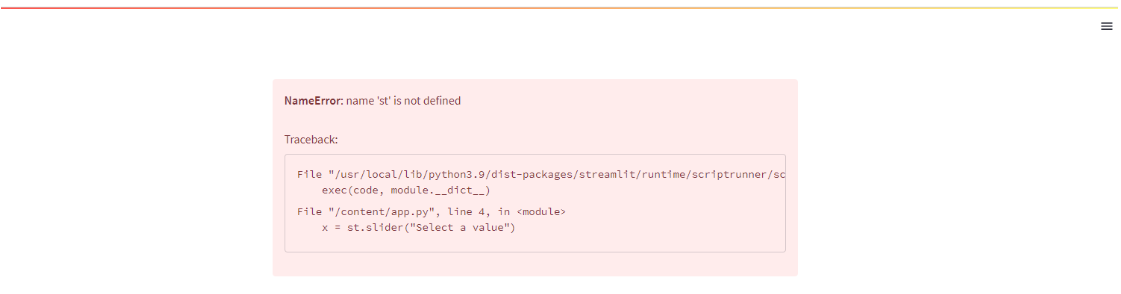

In [ ]:
# 테스트 app.py 파일 3
%%writefile app.py
import streamlit as st
import pandas as pd

uploaded_file = st.file_uploader(
    label = '원하는 이미지를 업로드 해주세요',
    type=["jpg", 'png'],
    accept_multiple_files=False
)

Overwriting app.py


테스트 app.py 파일 3 실행 결과

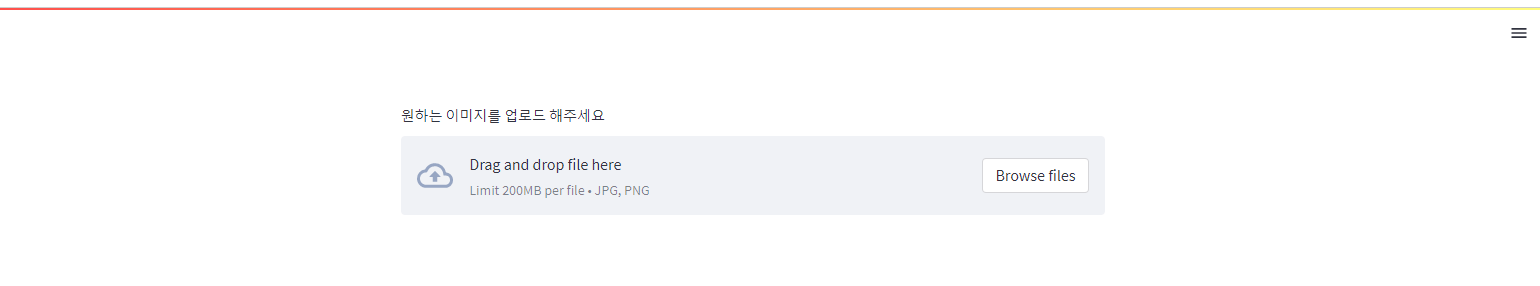

In [ ]:
# 클라우드 환경에 app.py가 생성되었는지 확인
!ls

app.py	sample_data


In [ ]:
# ngrok 토큰 설정
!ngrok authtoken 2Jceqy8yiwAKSaUTrV1cdlApyM5_kxwbNYnpAs6mdyVcnUUL

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# streamlit 백그라운드로 실행, ngrok과 streamlit 연결
from pyngrok import ngrok

!streamlit run app.py&>/dev/null&
publ_url = ngrok.connect(addr='8501')
publ_url

<NgrokTunnel: "http://4be3-35-245-90-234.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
# streamlit 프로세스와 ngrok 프로세스 kill
!ps

    PID TTY          TIME CMD
      1 ?        00:00:00 docker-init
      6 ?        00:00:05 node
     18 ?        00:00:00 tail
     28 ?        00:00:00 oom_monitor.sh
     30 ?        00:00:00 run.sh
     31 ?        00:00:00 kernel_manager_
     58 ?        00:00:06 python3 <defunct>
     59 ?        00:00:00 colab-fileshim.
     80 ?        00:00:05 jupyter-noteboo
     81 ?        00:00:00 dap_multiplexer
    670 ?        00:00:05 python3
    701 ?        00:00:01 python3
   1037 ?        00:00:03 streamlit
   1275 ?        00:00:01 streamlit
   1600 ?        00:00:01 streamlit
   1801 ?        00:00:01 streamlit
   1889 ?        00:00:01 streamlit
   2238 ?        00:00:01 streamlit
   2239 ?        00:00:00 ngrok
   2859 ?        00:00:09 node
   2914 ?        00:00:02 streamlit
   2950 ?        00:00:00 sleep
   2953 ?        00:00:00 ps


In [ ]:
!kill 163

/bin/bash: line 0: kill: (163) - No such process


In [ ]:
ngrok.kill()